**Sampling Theorem**

The Nyquist-Shannon Sampling Theorem is a fundamental principle in signal processing. It states that a continuous-time signal can be perfectly reconstructed from its discrete samples if the sampling frequency (fs) is greater than twice the highest frequency component (f_max) in the signal. This threshold, fs > 2 * f_max, is known as the Nyquist rate. If this condition is met, the original signal can be recovered without loss using interpolation methods like sinc interpolation.

To arrive at this: Consider a band-limited signal with frequencies up to f_max. Sampling creates replicas of the spectrum at multiples of fs. If fs > 2 * f_max, these replicas don't overlap, allowing perfect reconstruction via low-pass filtering. If fs ≤ 2 * f_max, overlap occurs, leading to distortion (aliasing, discussed below).

For demonstration, we'll use Python with NumPy to generate a simple sine wave signal of frequency f = 5 Hz over t = 0 to 1 second. The Nyquist rate here is 10 Hz.

Here's the core Python code to generate the data (you can run this locally):

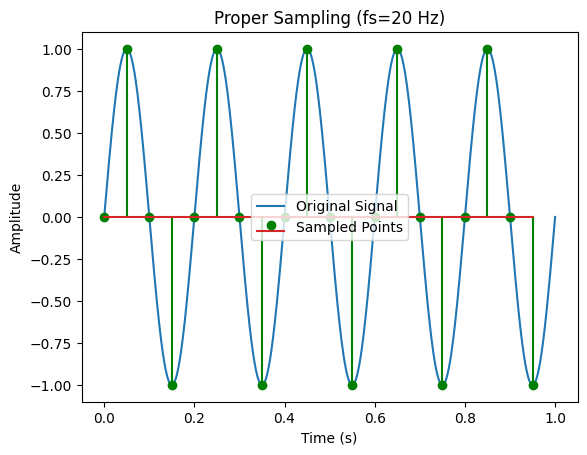

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5  # Hz
T = 1  # second
t_continuous = np.linspace(0, T, 1000)  # For plotting
signal_continuous = np.sin(2 * np.pi * f * t_continuous)

# Proper sampling: fs = 20 Hz > 10 Hz
fs_proper = 20
t_proper = np.arange(0, T, 1/fs_proper)
signal_proper = np.sin(2 * np.pi * f * t_proper)

# Plot original and sampled
plt.figure()
plt.plot(t_continuous, signal_continuous, label='Original Signal')
plt.stem(t_proper, signal_proper, label='Sampled Points', linefmt='g-', markerfmt='go')
plt.title('Proper Sampling (fs=20 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

This code computes the continuous signal and samples it adequately. The np.sin generates the wave, np.linspace creates dense time points for visualization, and np.arange with step 1/fs samples it. Plotting shows the samples align well with the original.

---
In the above visualization (or if you run the code), the sampled points (green) closely follow the original signal (blue), allowing accurate reconstruction.


**Aliasing Effect**

Aliasing occurs when the sampling frequency is below the Nyquist rate (fs < 2 * f_max). High-frequency components "fold" back into lower frequencies, distorting the signal. The aliased frequency f_alias can be calculated as |f - k * fs| where k is an integer that minimizes the result to between -fs/2 and fs/2.

In our example, sampling the 5 Hz signal at fs=8 Hz (<10 Hz) results in an alias at 3 Hz (8-5=3). The undersampled points appear to represent a 3 Hz sine wave instead of the original 5 Hz.

Updated Python code for aliasing:

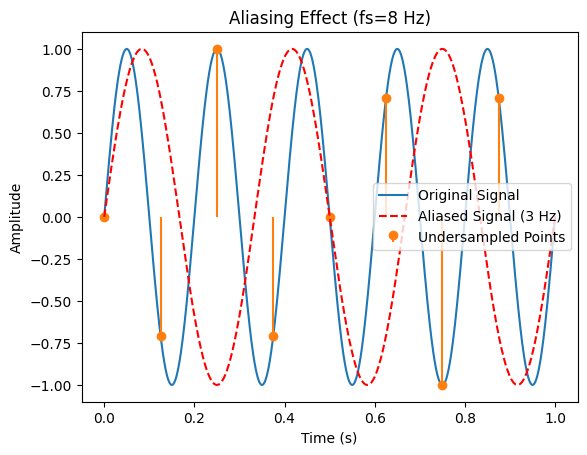

In [6]:
# Undersampling: fs = 8 Hz < 10 Hz
fs_under = 8
t_under = np.arange(0, T, 1/fs_under)
signal_under = np.sin(2 * np.pi * f * t_under)

# Alias signal: 3 Hz
f_alias = fs_under - f
signal_alias = np.sin(2 * np.pi * f_alias * t_continuous)

# Plot
plt.figure()
plt.plot(t_continuous, signal_continuous, label='Original Signal')
plt.stem(t_under, signal_under, label='Undersampled Points', linefmt='C1-', markerfmt='o', basefmt=" ")
plt.plot(t_continuous, signal_alias, '--', label='Aliased Signal (3 Hz)', color='red')
plt.title('Aliasing Effect (fs=8 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Here, we compute the undersampled points and the alias waveform. The plot shows how the undersampled points (orange) match the lower-frequency alias (red dashed) rather than the original (blue).

---

In this visualization, notice how the undersampled points no longer capture the original 5 Hz oscillations but instead trace the 3 Hz alias, illustrating the distortion. To avoid aliasing in practice, always sample above the Nyquist rate and use anti-aliasing filters before sampling.

**Sampling at fs = 10 kHz (Exactly the Nyquist Rate)**

To demonstrate the case where the sampling frequency fs = 10 kHz and the signal frequency is f = 5 kHz (so fs = exactly 2 × f, the Nyquist rate), we'll use Python again.

This is a critical sampling scenario. According to the Nyquist-Shannon theorem:

Sampling at exactly the Nyquist rate allows perfect reconstruction in theory for band-limited signals.

However, in practice with a pure sine wave phased unfortunately (or with real interpolation filters), it can be borderline and sensitive to phase or slight frequency deviations.

For a sine wave starting at zero (sin(2πft)), sampling exactly at 10 kHz places samples at times t = n / 10000 s, where the signal values are extremely close to zero (due to sin(π n) = 0 for integer n).

Here's the Python code:

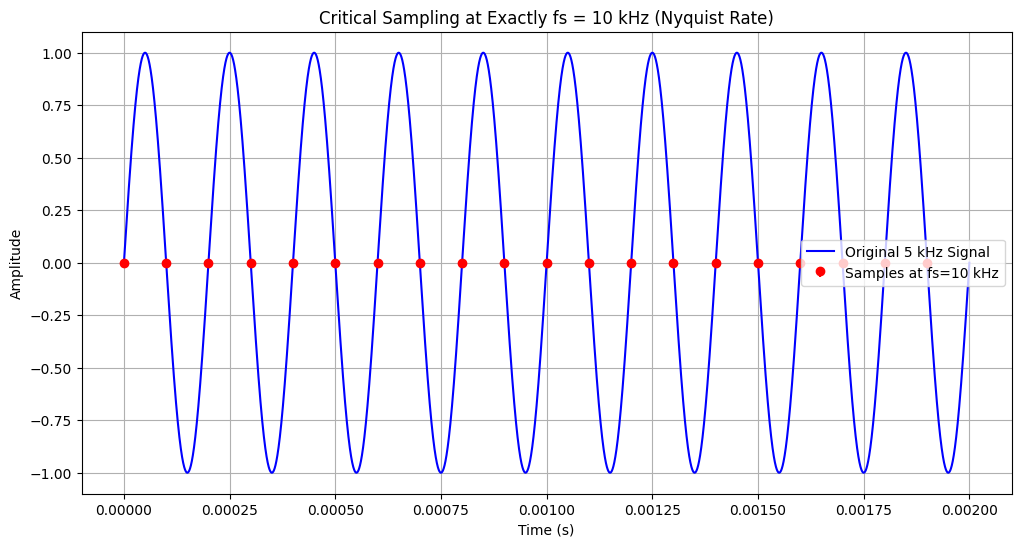

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5000      # Signal frequency: 5 kHz
fs = 10000    # Sampling frequency: 10 kHz (exactly Nyquist rate)
T = 0.002     # Duration: 2 ms (shows 10 full cycles of the 5 kHz signal)

# Continuous time for smooth plotting
t_cont = np.linspace(0, T, 10000)
signal_cont = np.sin(2 * np.pi * f * t_cont)

# Discrete samples
t_samples = np.arange(0, T, 1/fs)
signal_samples = np.sin(2 * np.pi * f * t_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t_cont, signal_cont, label='Original 5 kHz Signal', color='blue')
plt.stem(t_samples, signal_samples, label='Samples at fs=10 kHz',
         linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title('Critical Sampling at Exactly fs = 10 kHz (Nyquist Rate)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

When you run this code, the plot shows:

The original 5 kHz sine wave oscillating rapidly.
The sampled points (red stems) are all very close to zero (effectively appearing as if the signal is zero).

This happens because the sampling instants coincide with (or very near) the zero-crossings of the sine wave.

What does this mean?

* The samples do contain the information of a 5 kHz sine wave in theory.
* But if you tried to reconstruct the signal using common interpolation (e.g., linear or zero-order hold), it would look almost flat (nearly zero).
* Perfect reconstruction requires ideal sinc interpolation, which can recover the original wave even from these samples.
* In real-world systems, sampling exactly at the Nyquist rate is risky — slight phase shifts, frequency drift, or non-ideal filters can cause severe distortion or complete loss of the signal.

**Slight Undersampling (fs just below 10 kHz)**

If we reduce fs slightly (e.g., to 9.9 kHz), aliasing appears immediately:

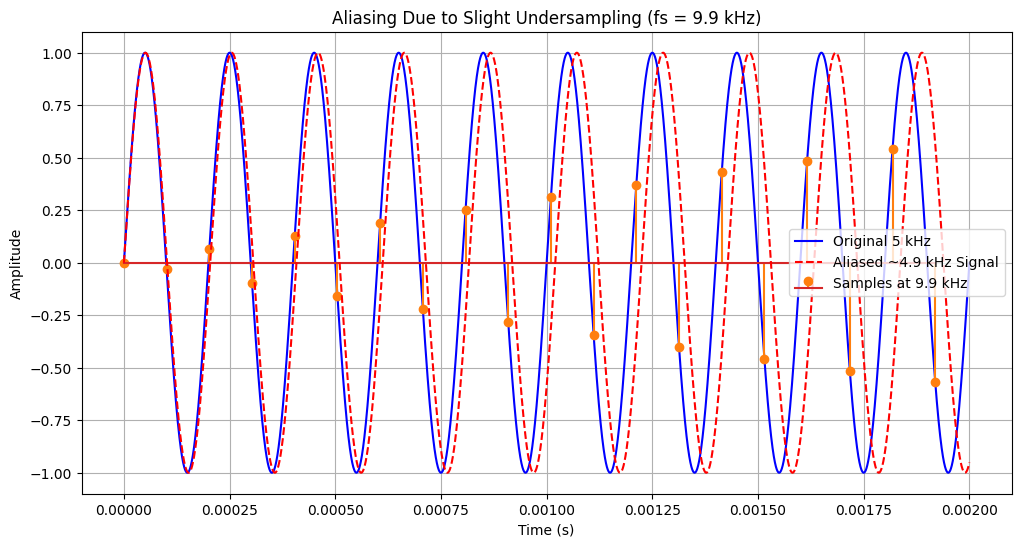

In [9]:
fs_under = 9900
t_under = np.arange(0, T, 1/fs_under)
signal_under = np.sin(2 * np.pi * f * t_under)

# Aliased frequency appears at fs - f = 4900 Hz
f_alias = fs_under - f
signal_alias = np.sin(2 * np.pi * f_alias * t_cont)

plt.figure(figsize=(12, 6))
plt.plot(t_cont, signal_cont, label='Original 5 kHz', color='blue')
plt.stem(t_under, signal_under, label='Samples at 9.9 kHz',
         linefmt='C1-', markerfmt='o') # Changed 'orange-' to 'C1-'
plt.plot(t_cont, signal_alias, '--', label='Aliased ~4.9 kHz Signal', color='red')
plt.title('Aliasing Due to Slight Undersampling (fs = 9.9 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Here, the samples now follow a lower-frequency (~4.9 kHz) sine wave — clear aliasing distortion.
Key Takeaway

* fs > 2 × f_max → Safe, perfect reconstruction possible.
* fs = 2 × f_max → Theoretically possible, but practically fragile (especially for sine waves with this phase).
* fs < 2 × f_max → Aliasing occurs, irreversible distortion.

In real applications (audio, radar, etc.), we always sample at fs ≥ 2.2–2.5 × f_max or higher and use anti-aliasing filters to ensure safety.

**Standard Definitons:**

1. **Sampling Theorem (Nyquist-Shannon Sampling Theorem)**

The Nyquist-Shannon sampling theorem states that a continuous-time band-limited signal can be perfectly reconstructed from its discrete samples if the sampling rate is greater than twice the highest frequency component (bandwidth) in the signal. This minimum required sampling rate is known as the Nyquist rate.

**Formally:** For a signal with maximum frequency $f_{\max}$ (or bandwidth $B$), the sampling frequency $f_s$ must satisfy $f_s > 2f_{\max}$ (or $f_s > 2B$) to avoid distortion and allow perfect reconstruction via methods like sinc interpolation.

2. **Aliasing Effect**

Aliasing is the distortion that occurs when a continuous signal is sampled at a rate below the Nyquist rate ($f_s < 2f_{\max}$). Higher-frequency components in the signal "fold" back into lower frequencies, appearing as false low-frequency signals (aliases) in the sampled data that were not present in the original signal.

This results in irreversible overlap in the frequency spectrum, making accurate reconstruction impossible without prior band-limiting (e.g., via anti-aliasing filters).

3. **Oversampling**

Oversampling is the process of sampling a signal at a rate significantly higher than the Nyquist rate ($f_s \gg 2f_{\max}$). The oversampling factor is often denoted as $N$, where $f_s = N \times$ (Nyquist rate).

Benefits include improved signal-to-noise ratio, relaxed requirements for anti-aliasing filters, reduced quantization noise, and better resistance to aliasing.

4. **Undersampling**

Undersampling (or bandpass sampling) generally refers to sampling a signal at a rate below the Nyquist rate relative to its highest frequency ($f_s < 2f_{\max}$), which typically causes aliasing in baseband signals.

**Problem and Solution:**

Problem 1: Sampling Theorem and Reconstruction

**Question: State the Nyquist-Shannon sampling theorem and derive the condition for perfect reconstruction of a band-limited signal. Consider a continuous-time signal $x(t) = \cos(2\pi \cdot 100 t) + \sin(2\pi \cdot 300 t)$ with maximum frequency component of 300 Hz. Determine the minimum sampling frequency required for perfect reconstruction. If the signal is sampled at 500 Hz, explain whether reconstruction is possible and justify using the frequency domain perspective.**

Solution:

The Nyquist-Shannon sampling theorem states that a continuous-time signal $x(t)$ that is band-limited to a maximum frequency $f_{\max}$ (i.e., its Fourier transform $X(f) = 0$ for $|f| > f_{\max}$) can be perfectly reconstructed from its samples $x[n] = x(n T_s)$ if the sampling frequency $f_s = 1/T_s > 2 f_{\max}$, where $T_s$ is the sampling period. This minimum rate $2 f_{\max}$ is called the Nyquist rate.

---

For the given signal $x(t) = \cos(2\pi \cdot 100 t) + \sin(2\pi \cdot 300 t)$, the frequency components are at 100 Hz and 300 Hz, so $f_{\max} = 300$ Hz.

The minimum sampling frequency (Nyquist rate) is $f_s > 600$ Hz.
If sampled at 500 Hz ($f_s = 500$ Hz < 600 Hz), reconstruction is not possible due to aliasing.

In the frequency domain, the replica from the 300 Hz component will overlap: the aliased frequency for 300 Hz is $|300 - 500| = 200$ Hz, which falls within the baseband (0 to 250 Hz) and distorts the original 100 Hz and 300 Hz components.

---




Problem 2: Aliasing, Oversampling, and Undersampling

**Question: Define aliasing and explain its cause with a frequency-domain illustration. For a signal with frequency components up to 4 kHz, calculate the aliased frequency if sampled at 6 kHz. Discuss the advantages of oversampling in digital signal processing systems.**

Solution:

Aliasing Definition and Cause:

Aliasing is the phenomenon where high-frequency components in a signal appear as lower-frequency components in the sampled signal due to insufficient sampling rate ($f_s < 2 f_{\max}$). It occurs because sampling creates spectral replicas at multiples of $f_s$, and if replicas overlap in the baseband (-$f_s/2$ to $f_s/2$), the original spectrum is distorted. In the frequency domain, for a signal component at frequency $f$, the aliased frequency is $f_a = |f - k f_s|$, where $k$ is chosen such that $-f_s/2 \leq f_a \leq f_s/2$.

For a signal with $f_{\max} = 4$ kHz sampled at $f_s = 6$ kHz, the Nyquist frequency is 3 kHz. A component at 4 kHz aliases to $|4 - 6| = 2$ kHz (since 4 > 3, it folds back from the first replica).

Advantages of Oversampling:

Oversampling ($f_s \gg 2 f_{\max}$) offers:

* Relaxed anti-aliasing filter requirements (steeper roll-off not needed).
* Improved signal-to-noise ratio (SNR) by spreading quantization noise over a wider bandwidth.
* Better tolerance to timing jitter and easier digital filtering.
* Enhanced resolution in applications like audio (e.g., 96 kHz sampling for 20 kHz audio).
